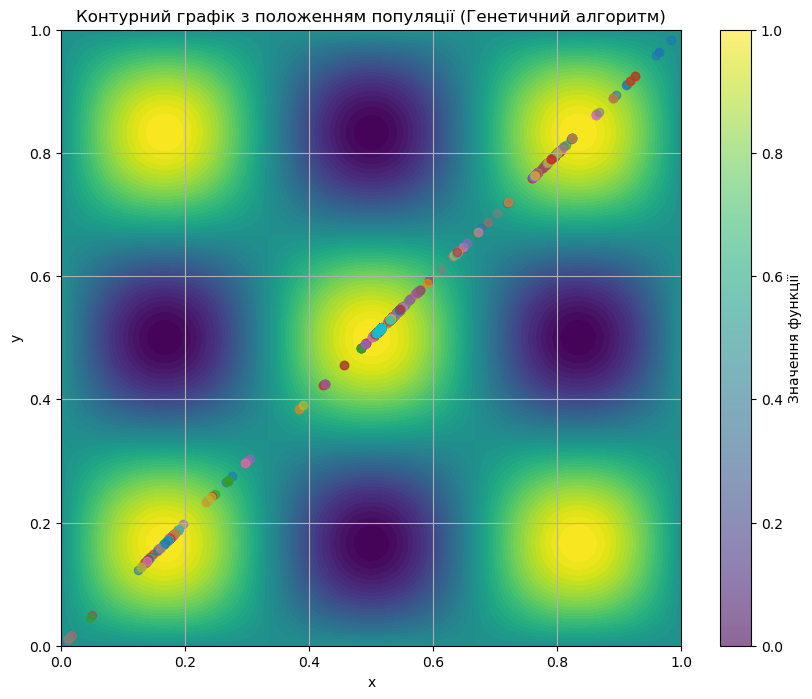

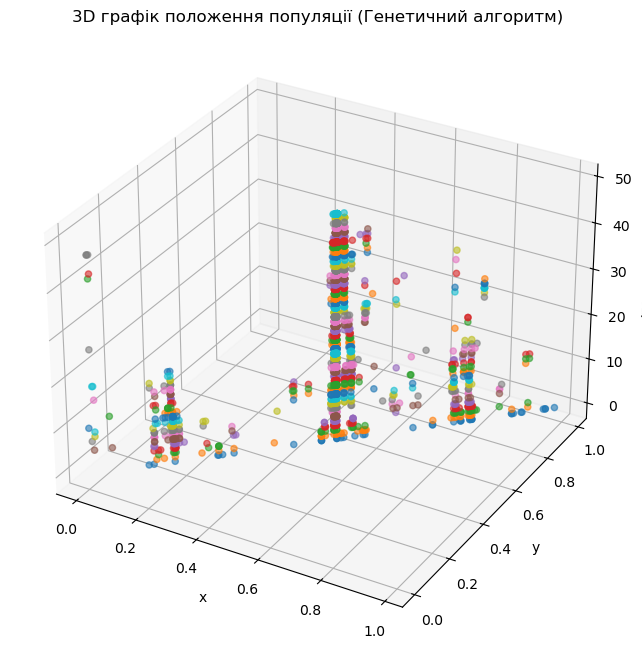

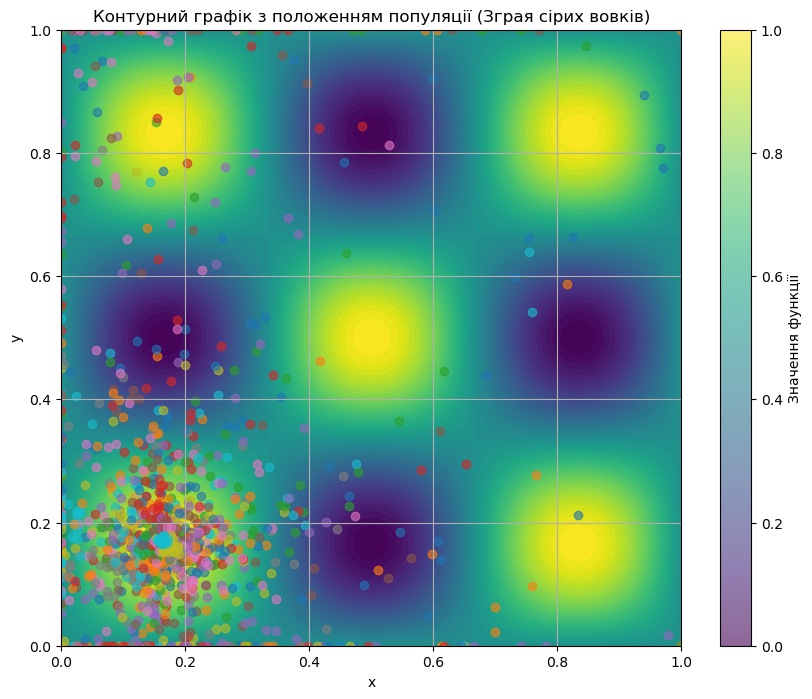

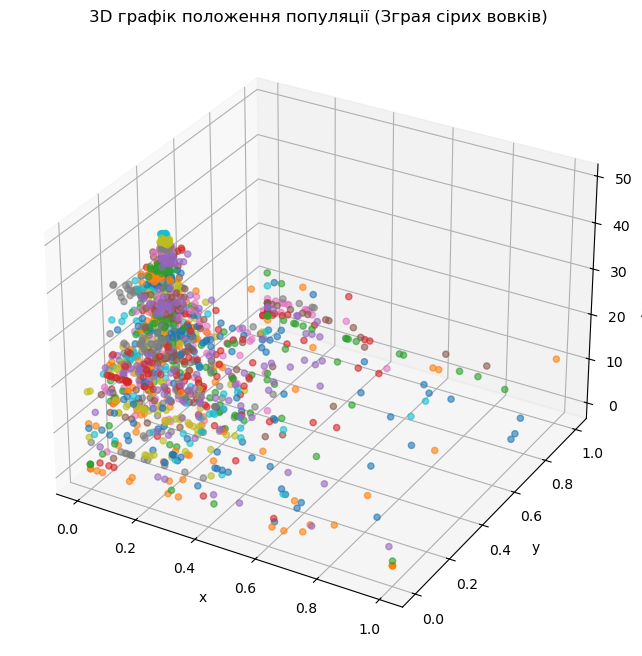

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# Пояснення:
# Реалізовано модифікації для пошуку глобальних екстремумів на багатовимірній функції.
# Зміни включають відображення контурних і 3D графіків для двовимірної функції.
# Додано обмеження для GWO, щоб вовки залишались у межах [0, 1].

class GeneticSolver:
    def __init__(self, bounds, genome_size, population_count, generations=100, mutation_rate=0.01, crossover_rate=0.7, seed=42):
        np.random.seed(seed)
        self.low, self.high = bounds
        self.genome_size = genome_size
        self.population_count = population_count
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.population = self.create_initial_population()

    def create_initial_population(self):
        return [''.join(np.random.choice(['0', '1'], self.genome_size)) for _ in range(self.population_count)]

    def decode_genome(self, genome):
        value = int(genome, 2)
        x = self.low + (value / (2**self.genome_size - 1)) * (self.high - self.low)
        y = self.low + (value / (2**self.genome_size - 1)) * (self.high - self.low)
        return x, y

    def calculate_fitness(self, x, y):
        return np.sin(3 * np.pi * x) * np.sin(3 * np.pi * y)

    def select_parents(self):
        fitness = np.array([self.calculate_fitness(*self.decode_genome(gen)) for gen in self.population])
        probabilities = fitness / fitness.sum()
        parents = np.random.choice(self.population, size=self.population_count, p=probabilities)
        return parents

    def crossover(self, parent1, parent2):
        if np.random.rand() < self.crossover_rate:
            point = np.random.randint(1, self.genome_size - 1)
            child1 = parent1[:point] + parent2[point:]
            child2 = parent2[:point] + parent1[point:]
            return child1, child2
        return parent1, parent2

    def mutate(self, genome):
        genome = list(genome)
        for i in range(len(genome)):
            if np.random.rand() < self.mutation_rate:
                genome[i] = '1' if genome[i] == '0' else '0'
        return ''.join(genome)

    def evolve(self):
        positions_over_time = []
        for generation in range(self.generations):
            parents = self.select_parents()
            next_generation = []
            for i in range(0, len(parents), 2):
                parent1, parent2 = parents[i], parents[i+1]
                child1, child2 = self.crossover(parent1, parent2)
                next_generation.append(self.mutate(child1))
                next_generation.append(self.mutate(child2))
            self.population = next_generation[:self.population_count]
            decoded = [self.decode_genome(gen) for gen in self.population]
            positions_over_time.append(decoded)
        self.plot_population_contour(positions_over_time)
        self.plot_population_3d(positions_over_time)

    def plot_population_contour(self, positions_over_time):
        x = np.linspace(self.low, self.high, 100)
        y = np.linspace(self.low, self.high, 100)
        X, Y = np.meshgrid(x, y)
        Z = self.calculate_fitness(X, Y)

        plt.figure(figsize=(10, 8))
        plt.contourf(X, Y, Z, levels=50, cmap='viridis')
        for i, positions in enumerate(positions_over_time):
            x_pos, y_pos = zip(*positions)
            plt.scatter(x_pos, y_pos, alpha=0.6, label=f'Ітерація {i+1}' if i == 0 else '')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Контурний графік з положенням популяції (Генетичний алгоритм)')
        plt.colorbar(label='Значення функції')
        plt.grid(True)
        plt.show()

    def plot_population_3d(self, positions_over_time):
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        for i, positions in enumerate(positions_over_time):
            x_pos, y_pos = zip(*positions)
            z_pos = [i] * len(x_pos)
            ax.scatter(x_pos, y_pos, z_pos, alpha=0.6)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('Ітерація')
        ax.set_title('3D графік положення популяції (Генетичний алгоритм)')
        plt.show()

class GreyWolfOptimizer:
    def __init__(self, bounds, wolves_count, generations=100, seed=42):
        np.random.seed(seed)
        self.low, self.high = bounds
        self.wolves_count = wolves_count
        self.generations = generations
        self.positions = np.random.uniform(self.low, self.high, (wolves_count, 2))

    def fitness_function(self, x, y):
        return np.sin(3 * np.pi * x) * np.sin(3 * np.pi * y)

    def optimize(self):
        positions_over_time = []
        for gen in range(self.generations):
            fitness = np.array([self.fitness_function(pos[0], pos[1]) for pos in self.positions])
            alpha = self.positions[np.argmax(fitness)]
            positions_over_time.append(self.positions.copy())
            a = 2 - gen * (2 / self.generations)
            for i in range(self.wolves_count):
                A = 2 * a * np.random.rand(2) - a
                C = 2 * np.random.rand(2)
                D_alpha = np.abs(C * alpha - self.positions[i])
                self.positions[i] = np.clip(alpha - A * D_alpha, self.low, self.high)
        self.plot_population_contour(positions_over_time)
        self.plot_population_3d(positions_over_time)

    def plot_population_contour(self, positions_over_time):
        x = np.linspace(self.low, self.high, 100)
        y = np.linspace(self.low, self.high, 100)
        X, Y = np.meshgrid(x, y)
        Z = self.fitness_function(X, Y)

        plt.figure(figsize=(10, 8))
        plt.contourf(X, Y, Z, levels=50, cmap='viridis')
        for i, positions in enumerate(positions_over_time):
            plt.scatter(positions[:, 0], positions[:, 1], alpha=0.6)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Контурний графік з положенням популяції (Зграя сірих вовків)')
        plt.colorbar(label='Значення функції')
        plt.grid(True)
        plt.show()

    def plot_population_3d(self, positions_over_time):
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        for i, positions in enumerate(positions_over_time):
            ax.scatter(positions[:, 0], positions[:, 1], i, alpha=0.6)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('Ітерація')
        ax.set_title('3D графік положення популяції (Зграя сірих вовків)')
        plt.show()

bounds = (0, 1)
solver = GeneticSolver(bounds, 18, 40, 50, 0.01, 0.7)
solver.evolve()

gwo_solver = GreyWolfOptimizer(bounds, 30, 50)
gwo_solver.optimize()

**Висновки**:
1. Генетичний алгоритм показав стабільну збіжність до глобального екстремуму, використовуючи кросовер та мутацію для дослідження простору рішень. Завдяки поступовій оптимізації положення популяції алгоритм добре підходить для багатовимірних функцій з обмеженнями. Проте швидкість збіжності GA може бути нижчою порівняно з іншими методами, особливо на ранніх ітераціях.
2. Алгоритм GWO продемонстрував швидку адаптацію до функції та ефективний пошук глобального екстремуму завдяки поведінковій моделі координації з альфа-лідером. Він виявився особливо корисним для безперервних просторів оптимізації, проте початкові коливання положень популяції вказують на залежність від параметрів і початкової ініціалізації. Після модифікацій для утримання позицій у межах області визначення алгоритм успішно стабілізувався й досягнув бажаних результатів.